In [1]:
import pandas as pd
import networkx as nx
import random
import operator

In [2]:
df = pd.read_csv('facebook_combined.txt', delimiter=" ")
df.columns =['FromNodeId', 'ToNodeId']
g = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId', create_using=nx.Graph())
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88233
Average degree:  43.6905


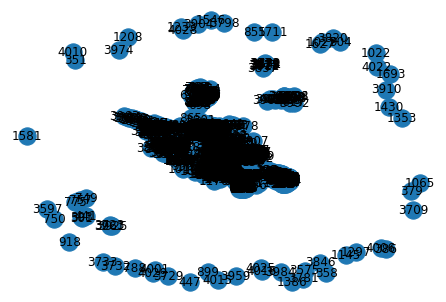

In [3]:
k = 2000
sampled_nodes = random.sample(g.nodes, k)
G1 = g.subgraph(sampled_nodes)
nx.draw(G1, with_labels=True)

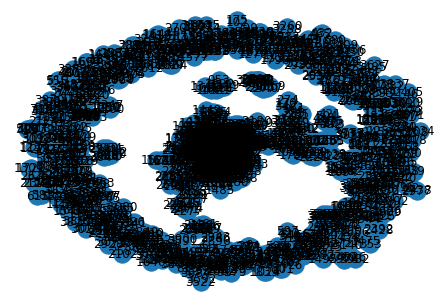

In [4]:
k = 1000
sampled_edgs = random.sample(g.edges(), k)
G2 = nx.Graph(sampled_edgs)
nx.draw(G2, with_labels=True)

In [5]:
growth_size = 2
T = 100    # number of iterations
def random_walk_sampling_simple(complete_graph, nodes_to_sample):
        complete_graph = nx.convert_node_labels_to_integers(complete_graph, 0, 'default', True)
        # giving unique id to every node same as built-in function id
        for n, data in complete_graph.nodes(data=True):
            complete_graph.nodes[n]['id'] = n

        nr_nodes = len(complete_graph.nodes())
        upper_bound_nr_nodes_to_sample = nodes_to_sample
        index_of_first_random_node = random.randint(0, nr_nodes - 1)
        sampled_graph = nx.Graph()

        sampled_graph.add_node(complete_graph.nodes[index_of_first_random_node]['id'])

        iteration = 1
        edges_before_t_iter = 0
        curr_node = index_of_first_random_node
        while sampled_graph.number_of_nodes() != upper_bound_nr_nodes_to_sample:
            edges = [n for n in complete_graph.neighbors(curr_node)]
            index_of_edge = random.randint(0, len(edges) - 1)
            chosen_node = edges[index_of_edge]
            sampled_graph.add_node(chosen_node)
            sampled_graph.add_edge(curr_node, chosen_node)
            curr_node = chosen_node
            iteration = iteration + 1

            if iteration % T == 0:
                if ((sampled_graph.number_of_edges() - edges_before_t_iter) < growth_size):
                    curr_node = random.randint(0, nr_nodes - 1)
                edges_before_t_iter = sampled_graph.number_of_edges()
        return sampled_graph

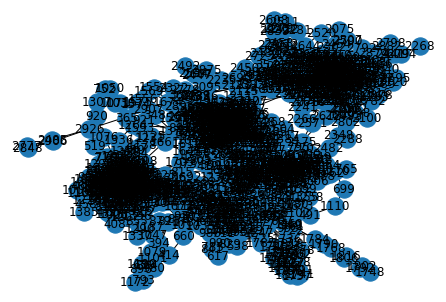

In [6]:
G3 = random_walk_sampling_simple(g,random.choice(list(g.nodes())))
nx.draw(G3, with_labels=True)

In [7]:
def find_important_nodes(graph):
    dic = {}
    for n in graph.degree():
        dic[n[0]] = n[1]
    sorted_d = dict( sorted(dic.items(), key=operator.itemgetter(1),reverse=True))
    return [k for k in list(sorted_d)[:100]]

In [8]:
most_important_nodes_G1 = find_important_nodes(G1)
most_important_nodes_G1

[1684,
 1912,
 0,
 483,
 1985,
 2233,
 1993,
 1941,
 2123,
 1730,
 2240,
 2369,
 2507,
 2604,
 2611,
 1938,
 2047,
 2073,
 2131,
 1827,
 2059,
 2184,
 2323,
 2593,
 2601,
 2624,
 1943,
 2118,
 2602,
 2064,
 2201,
 2275,
 1917,
 2290,
 2500,
 2615,
 1971,
 2326,
 2376,
 2414,
 1584,
 1718,
 1746,
 1962,
 2045,
 2104,
 2139,
 1979,
 1984,
 2140,
 2354,
 2492,
 1577,
 2093,
 2352,
 2460,
 2037,
 2289,
 2374,
 414,
 2133,
 2278,
 2356,
 2630,
 2081,
 2333,
 2404,
 1078,
 2054,
 2087,
 1391,
 1613,
 2598,
 2619,
 1833,
 2154,
 1714,
 2069,
 2550,
 2561,
 1835,
 1839,
 2005,
 2446,
 896,
 1929,
 2084,
 2283,
 2495,
 1610,
 1736,
 2020,
 2032,
 2276,
 2482,
 2138,
 2299,
 2433,
 2095,
 2292]

In [9]:
most_important_nodes_G2 = find_important_nodes(G2)
most_important_nodes_G2

[107,
 3437,
 1912,
 1684,
 2624,
 2200,
 1946,
 2654,
 2510,
 2619,
 2473,
 2188,
 2376,
 2212,
 2410,
 1574,
 1329,
 2093,
 3299,
 2104,
 2719,
 2118,
 2218,
 2354,
 1804,
 2553,
 2131,
 2521,
 1583,
 1551,
 1997,
 2138,
 1868,
 1185,
 2550,
 2133,
 1610,
 1791,
 2086,
 1589,
 1613,
 2140,
 3106,
 1576,
 2153,
 2607,
 2575,
 2573,
 0,
 1377,
 3149,
 1715,
 1520,
 2563,
 1245,
 1006,
 2564,
 1352,
 2433,
 2103,
 2458,
 3434,
 1709,
 1962,
 1888,
 2717,
 1714,
 563,
 2282,
 2429,
 2611,
 1580,
 2183,
 3119,
 2546,
 2038,
 2327,
 2226,
 2800,
 2381,
 2143,
 2199,
 232,
 2020,
 2266,
 304,
 2165,
 1399,
 1230,
 1945,
 946,
 2189,
 1637,
 2088,
 2122,
 1689,
 1017,
 1964,
 1753,
 2492]

In [10]:
most_important_nodes_G3 = find_important_nodes(G3)
most_important_nodes_G3

[106,
 351,
 700,
 838,
 2871,
 1312,
 2403,
 2334,
 2614,
 1284,
 1285,
 1149,
 1069,
 2892,
 2689,
 885,
 1002,
 2443,
 2277,
 2369,
 1107,
 1033,
 670,
 479,
 763,
 378,
 564,
 635,
 1253,
 2597,
 2517,
 2832,
 562,
 1155,
 572,
 831,
 1199,
 1043,
 721,
 2435,
 2570,
 2501,
 2756,
 2636,
 2577,
 2444,
 2398,
 2188,
 2902,
 1346,
 917,
 1373,
 974,
 1045,
 556,
 490,
 862,
 432,
 658,
 965,
 1745,
 618,
 1347,
 1037,
 1298,
 2933,
 2273,
 2351,
 2801,
 2468,
 2527,
 2329,
 2238,
 2744,
 948,
 1114,
 1129,
 823,
 1056,
 1324,
 1783,
 349,
 753,
 2578,
 2704,
 2684,
 2326,
 2251,
 2312,
 2382,
 2478,
 2451,
 2487,
 2750,
 2715,
 2330,
 2296,
 2639,
 2542,
 2769]

In [11]:
most_important_nodes_g = find_important_nodes(g)
most_important_nodes_g

[107,
 1684,
 1912,
 3437,
 0,
 2543,
 2347,
 1888,
 1800,
 1663,
 1352,
 2266,
 483,
 348,
 1730,
 1985,
 1941,
 2233,
 2142,
 1431,
 1199,
 1584,
 2206,
 1768,
 2229,
 2410,
 2611,
 1086,
 1589,
 2047,
 2218,
 2078,
 1993,
 2123,
 1746,
 2464,
 1827,
 2240,
 2507,
 2560,
 2244,
 1983,
 2309,
 1126,
 2088,
 2131,
 2340,
 2602,
 2324,
 2369,
 2590,
 2542,
 2604,
 1804,
 2073,
 2220,
 2607,
 2188,
 1390,
 2059,
 2172,
 1943,
 2150,
 1833,
 1946,
 2428,
 2526,
 1377,
 1612,
 1917,
 2201,
 2331,
 2601,
 1621,
 1938,
 2090,
 2384,
 2118,
 2564,
 2624,
 1714,
 1962,
 2030,
 2586,
 1559,
 2064,
 2184,
 2625,
 1707,
 2275,
 2593,
 2615,
 2111,
 2103,
 2290,
 1078,
 2323,
 2414,
 1376,
 1613]

In [12]:
set(most_important_nodes_g).intersection(most_important_nodes_G1)

{0,
 483,
 1078,
 1584,
 1613,
 1684,
 1714,
 1730,
 1746,
 1827,
 1833,
 1912,
 1917,
 1938,
 1941,
 1943,
 1962,
 1985,
 1993,
 2047,
 2059,
 2064,
 2073,
 2118,
 2123,
 2131,
 2184,
 2201,
 2233,
 2240,
 2275,
 2290,
 2323,
 2369,
 2414,
 2507,
 2593,
 2601,
 2602,
 2604,
 2611,
 2615,
 2624}

In [13]:
set(most_important_nodes_g).intersection(most_important_nodes_G2)

{0,
 107,
 1352,
 1377,
 1589,
 1613,
 1684,
 1714,
 1804,
 1888,
 1912,
 1946,
 1962,
 2088,
 2103,
 2118,
 2131,
 2188,
 2218,
 2266,
 2410,
 2564,
 2607,
 2611,
 2624,
 3437}

In [14]:
set(most_important_nodes_g).intersection(most_important_nodes_G3)

{1199, 2188, 2369, 2542}